In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_exercise = pd.read_csv('exercise.csv')

In [3]:
df_exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df_calories = pd.read_csv('calories.csv')

In [5]:
df_calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
df_merge = pd.concat([df_exercise , df_calories['Calories']] ,axis=1)

In [7]:
df_merge.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df_merge.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<AxesSubplot:>

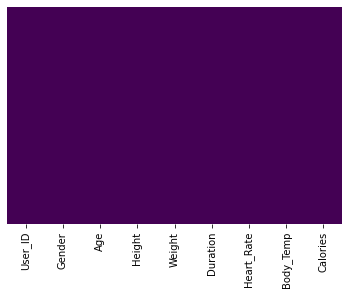

In [10]:
sns.heatmap(df_merge.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\satis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


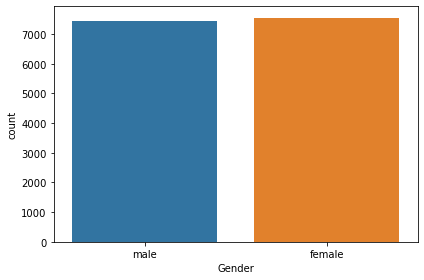

In [11]:
sns.countplot(df_exercise['Gender'])
plt.tight_layout()

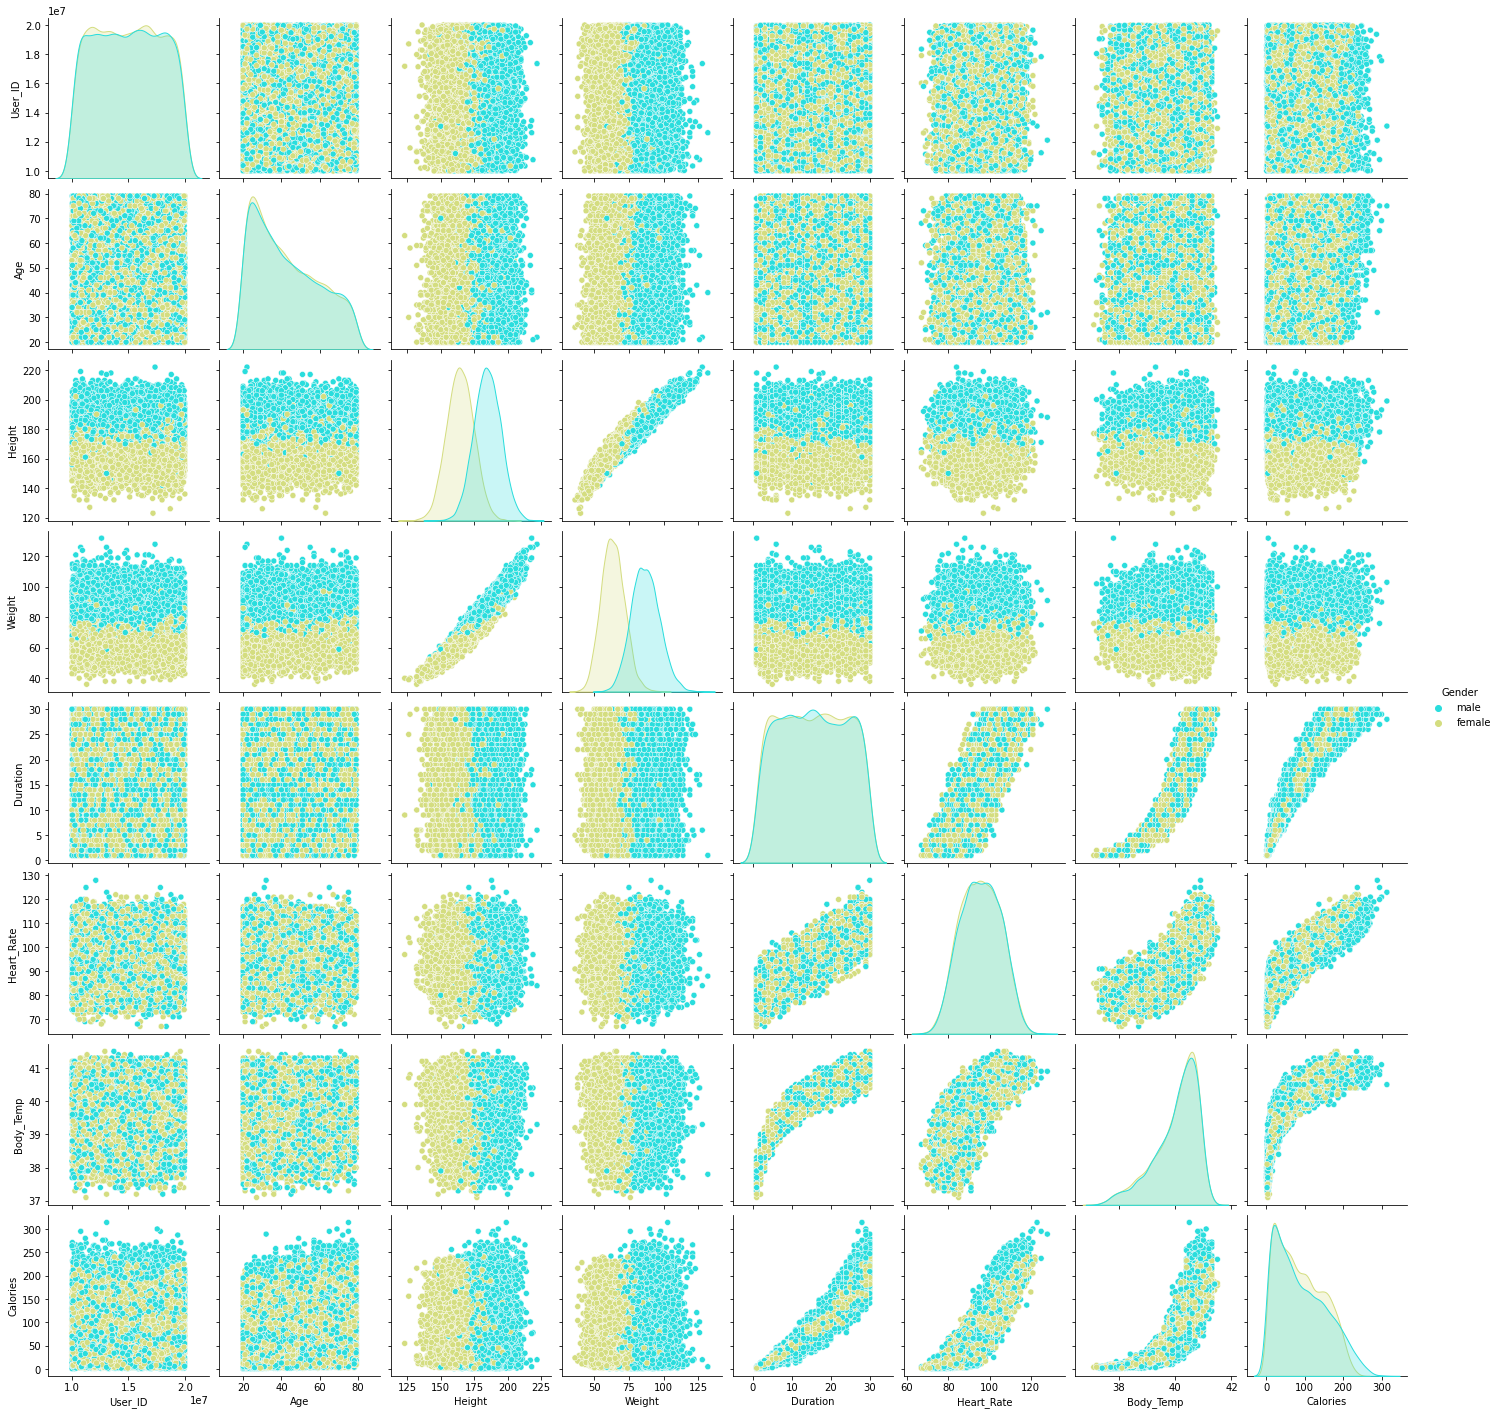

In [12]:
sns.pairplot(df_merge,hue = 'Gender',palette='rainbow')

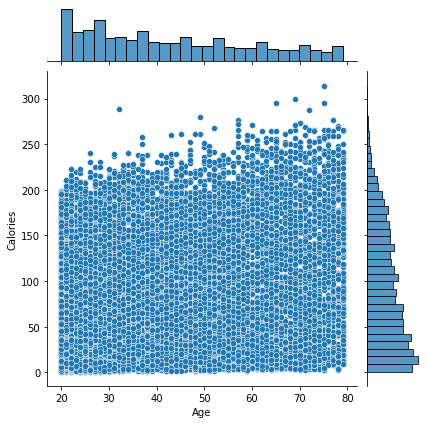

In [13]:
sns.jointplot(x='Age',y = 'Calories',data = df_merge)


C:\Users\satis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

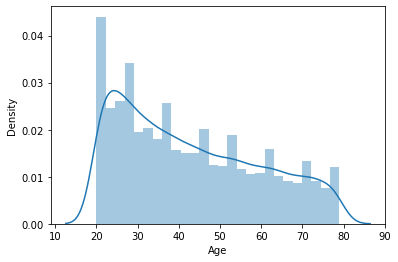

In [14]:
sns.distplot(df_merge['Age'])

<AxesSubplot:>

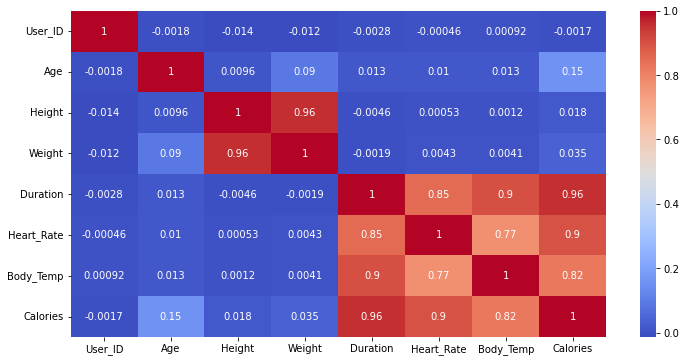

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_merge.corr(),cmap = 'coolwarm',annot = True)


In [16]:
df_merge['dummy'] = pd.get_dummies(df_merge['Gender'],drop_first=True)


In [17]:
df_merge.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,dummy
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,0


In [18]:
X = df_merge.drop(columns = ['User_ID','Calories','Gender'],axis =1)
y= df_merge['Calories']

In [19]:
X

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,dummy
0,68,190.0,94.0,29.0,105.0,40.8,1
1,20,166.0,60.0,14.0,94.0,40.3,0
2,69,179.0,79.0,5.0,88.0,38.7,1
3,34,179.0,71.0,13.0,100.0,40.5,0
4,27,154.0,58.0,10.0,81.0,39.8,0
...,...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4,0
14996,27,165.0,65.0,6.0,85.0,39.2,0
14997,43,159.0,58.0,16.0,90.0,40.1,0
14998,78,193.0,97.0,2.0,84.0,38.3,1


In [20]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators = 100)

In [62]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
rfc_pred = rfc.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.25      0.40         4
         2.0       0.67      0.59      0.62        17
         3.0       0.46      0.54      0.50        24
         4.0       0.68      0.65      0.67        40
         5.0       0.50      0.30      0.37        30
         6.0       0.56      0.59      0.57        34
         7.0       0.66      0.75      0.70        52
         8.0       0.36      0.48      0.42        33
         9.0       0.49      0.40      0.44        45
        10.0       0.36      0.37      0.37        35
        11.0       0.45      0.54      0.49        41
        12.0       0.43      0.35      0.39        46
        13.0       0.37      0.52      0.44        42
        14.0       0.36      0.25      0.30        48
        15.0       0.24      0.20      0.22        44
        16.0       0.29      0.34      0.31        32
        17.0       0.31      0.25      0.28        44
        18.0       0.28    

C:\Users\satis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\satis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\satis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\satis\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [23]:
from xgboost import XGBRegressor


In [24]:
model = XGBRegressor()


In [26]:
model.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [27]:
calories_burnt_prediction = model.predict(X_test)


In [39]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, calories_burnt_prediction)
MSE = metrics.mean_squared_error(y_test, calories_burnt_prediction)
RSE = np.sqrt(metrics.mean_squared_error(y_test, calories_burnt_prediction))

In [40]:
print(MAE)
print(MSE)
print(RSE)

1.4674944152494873
4.623580582108861
2.1502512834803427


In [1]:
import tensorflow as tf